# Dataset: Libros de Harry potter del 1 al 7

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import multiprocessing
from gensim.models import Word2Vec
#Usando el dataset de kaggle => https://www.kaggle.com/datasets/shubhammaindola/harry-potter-books

In [2]:
dataframes = []
# Concatenamos los libros en un solo dataframe
for i in range(1,8):
    dataframes.append(pd.read_csv(f'{i}.txt', sep='\\n', header=None)) 
df = pd.concat(dataframes)

C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_8228\6120507.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dataframes.append(pd.read_csv(f'{i}.txt', sep='\\n', header=None))
C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_8228\6120507.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dataframes.append(pd.read_csv(f'{i}.txt', sep='\\n', header=None))
C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_8228\6120507.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can 

In [3]:
print("Cantidad de documentos:", df.shape[0])

Cantidad de documentos: 38272


In [4]:
from keras.preprocessing.text import text_to_word_sequence

sentence_tokens = []
# Recorrer todas las filas y transformar las oraciones
# en una secuencia de palabras (esto podría realizarse con NLTK o spaCy también)
for _, row in df[:None].iterrows():
    sentence_tokens.append(text_to_word_sequence(row[0]))

In [5]:
# Demos un vistazo
sentence_tokens[1:2]

[['mr',
  'dursley',
  'was',
  'the',
  'director',
  'of',
  'a',
  'firm',
  'called',
  'grunnings',
  'which',
  'made',
  'drills',
  'he',
  'was',
  'a',
  'big',
  'beefy',
  'man',
  'with',
  'hardly',
  'any',
  'neck',
  'although',
  'he',
  'did',
  'have',
  'a',
  'very',
  'large',
  'mustache',
  'mrs',
  'dursley',
  'was',
  'thin',
  'and',
  'blonde',
  'and',
  'had',
  'nearly',
  'twice',
  'the',
  'usual',
  'amount',
  'of',
  'neck',
  'which',
  'came',
  'in',
  'very',
  'useful',
  'as',
  'she',
  'spent',
  'so',
  'much',
  'of',
  'her',
  'time',
  'craning',
  'over',
  'garden',
  'fences',
  'spying',
  'on',
  'the',
  'neighbors',
  'the',
  'dursleys',
  'had',
  'a',
  'small',
  'son',
  'called',
  'dudley',
  'and',
  'in',
  'their',
  'opinion',
  'there',
  'was',
  'no',
  'finer',
  'boy',
  'anywhere']]

In [6]:
from gensim.models.callbacks import CallbackAny2Vec
# Durante el entrenamiento gensim por defecto no informa el "loss" en cada época
# Sobrecargamos el callback para poder tener esta información
class callback(CallbackAny2Vec):
    """
    Callback to print loss after each epoch
    """
    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            print('Loss after epoch {}: {}'.format(self.epoch, loss))
        else:
            print('Loss after epoch {}: {}'.format(self.epoch, loss- self.loss_previous_step))
        self.epoch += 1
        self.loss_previous_step = loss

In [7]:
# Crearmos el modelo generador de vectores
# En este caso utilizaremos la estructura modelo Skipgram
w2v_model = Word2Vec(min_count=5,    # frecuencia mínima de palabra para incluirla en el vocabulario
                     window=10,       # cant de palabras antes y desp de la predicha
                     vector_size=300,       # dimensionalidad de los vectores 
                     negative=5,    # cantidad de negative samples... 0 es no se usa
                     workers=6,      # si tienen más cores pueden cambiar este valor
                     sg=1)           # modelo 0:CBOW  1:skipgram

In [8]:
# Obtener el vocabulario con los tokens
w2v_model.build_vocab(sentence_tokens)

In [9]:
# Cantidad de filas/docs encontradas en el corpus
print("Cantidad de docs en el corpus:", w2v_model.corpus_count)

Cantidad de docs en el corpus: 38272


In [10]:
# Cantidad de words encontradas en el corpus
print("Cantidad de words distintas en el corpus:", len(w2v_model.wv.index_to_key))

Cantidad de words distintas en el corpus: 10163


In [11]:
# Entrenamos el modelo generador de vectores
# Utilizamos nuestro callback
w2v_model.train(sentence_tokens,
                 total_examples=w2v_model.corpus_count,
                 epochs=100,
                 compute_loss = True,
                 callbacks=[callback()]
                 )

Loss after epoch 0: 3084895.75
Loss after epoch 1: 2622288.75
Loss after epoch 2: 2712124.5
Loss after epoch 3: 2113660.0
Loss after epoch 4: 2327628.0
Loss after epoch 5: 2286750.0
Loss after epoch 6: 2202929.0
Loss after epoch 7: 1884844.0
Loss after epoch 8: 2009040.0
Loss after epoch 9: 1884380.0
Loss after epoch 10: 1952580.0
Loss after epoch 11: 1869538.0
Loss after epoch 12: 1938254.0
Loss after epoch 13: 1863456.0
Loss after epoch 14: 1758618.0
Loss after epoch 15: 1450894.0
Loss after epoch 16: 1057060.0
Loss after epoch 17: 996964.0
Loss after epoch 18: 1039124.0
Loss after epoch 19: 1076684.0
Loss after epoch 20: 1082456.0
Loss after epoch 21: 993520.0
Loss after epoch 22: 1085432.0
Loss after epoch 23: 989268.0
Loss after epoch 24: 967252.0
Loss after epoch 25: 1126832.0
Loss after epoch 26: 966548.0
Loss after epoch 27: 1000436.0
Loss after epoch 28: 975732.0
Loss after epoch 29: 1058508.0
Loss after epoch 30: 995184.0
Loss after epoch 31: 1051760.0
Loss after epoch 32: 10

(83457992, 113333600)

In [12]:
# Palabras que MÁS se relacionan con...:
w2v_model.wv.most_similar(positive=["harry"], topn=10)

[('he', 0.6850086450576782),
 ('ron', 0.5960882902145386),
 ('hermione', 0.4831894338130951),
 ('him', 0.46857279539108276),
 ('and', 0.4490784704685211),
 ('said', 0.42848458886146545),
 ('his', 0.41926339268684387),
 ('it', 0.4162467420101166),
 ('”', 0.4122045636177063),
 ('as', 0.4089873731136322)]

In [13]:
w2v_model.wv.most_similar(positive=["voldemort"], topn=10)

[('lord', 0.6292930245399475),
 ('voldemort’s', 0.38940370082855225),
 ('immortality', 0.36425358057022095),
 ('wormtail', 0.36049556732177734),
 ('he', 0.3439558744430542),
 ('feared', 0.33317017555236816),
 ('invincible', 0.3108333945274353),
 ('snake', 0.3100906014442444),
 ('circle', 0.3047996163368225),
 ('conquer', 0.30204200744628906)]

In [14]:
w2v_model.wv.most_similar(positive=["wizard"], topn=10)

[('witch', 0.4107772707939148),
 ('wheezes', 0.3700721859931946),
 ('greatest', 0.3216624855995178),
 ('medieval', 0.3148975372314453),
 ('prison', 0.31101515889167786),
 ('scrubby', 0.3020804524421692),
 ('‘welcome', 0.30207064747810364),
 ('skilled', 0.2969333529472351),
 ('theft', 0.29167717695236206),
 ('balding', 0.28956884145736694)]

In [15]:
#Palabras que menos se relacionen con harry
w2v_model.wv.most_similar(negative=["harry"], topn=10)

[('crisp', 0.028767915442585945),
 ('revealed', 0.028761764988303185),
 ('currently', 0.024292947724461555),
 ('treatment', 0.021710041910409927),
 ('linked', 0.02014129050076008),
 ('olive', 0.017442792654037476),
 ('stains', 0.009978296235203743),
 ('follows', 0.006171269342303276),
 ('reported', 0.005646741483360529),
 ('grew', 0.004339051432907581)]

In [16]:
# Por analogia, wizard (masculino) - hombre + mujer = witch (femenino)
a = w2v_model.wv.get_vector("wizard")
b = w2v_model.wv.get_vector("man")
c = w2v_model.wv.get_vector("woman")
w2v_model.wv.most_similar(a-b+c)

[('woman', 0.6813039183616638),
 ('wizard', 0.5909514427185059),
 ('witch', 0.3089601993560791),
 ('wheezes', 0.30751878023147583),
 ('‘welcome', 0.26939547061920166),
 ('haughtily', 0.2688998281955719),
 ('despised', 0.2663593590259552),
 ("'sturgis", 0.2603462338447571),
 ('timid', 0.25758087635040283),
 ('“watch', 0.2551276683807373)]

In [17]:
from sklearn.decomposition import IncrementalPCA    
from sklearn.manifold import TSNE                   
import numpy as np                                  

def reduce_dimensions(model, num_dimensions = 2 ):
     
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  

    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    return vectors, labels

In [18]:
import plotly.graph_objects as go
import plotly.express as px
MAX_WORDS=200
# Graficar los embedddings en 3D

vecs, labels = reduce_dimensions(w2v_model,3)

fig = px.scatter_3d(x=vecs[:MAX_WORDS,0], y=vecs[:MAX_WORDS,1], z=vecs[:MAX_WORDS,2],text=labels[:MAX_WORDS])
fig.update_traces(marker_size = 2)
fig.show() 

In [19]:
vecs, labels = reduce_dimensions(w2v_model)

fig = px.scatter(x=vecs[:MAX_WORDS,0], y=vecs[:MAX_WORDS,1], text=labels[:MAX_WORDS])
fig.show() 

Representa muy bien el universo de harry potter y sus conceptos. Parece andar muy bien el embedding en esta situacion, al reducirle la dimensionalidad. Es un poco mas dificil de distinguir, en especial por que nuestro vocabulario es de mas de 10000 palabras, y solo representamos 200.
A continuacion hacemos ejemplos con solo algunas palabras intentando ver las posiciones en las que las dispone el embedding:

Podemos extraer las siguientes imagenes en 2D para que sean mas claras:


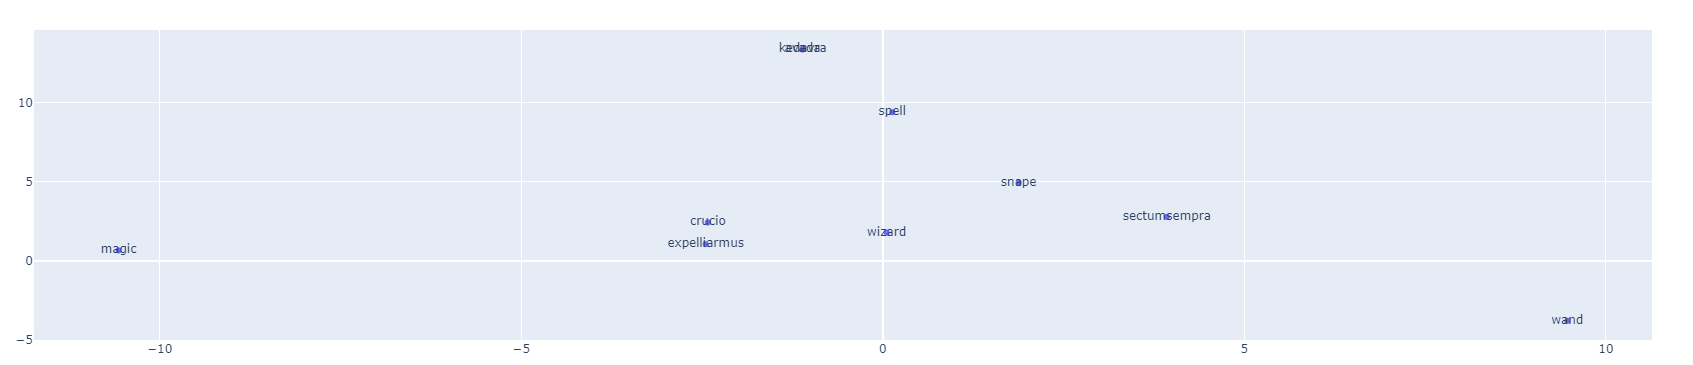

In [1]:
from IPython.display import Image
Image(filename='Picture1.png') 

Donde podemos ver algunos de los conceptos del mundo de harrypotter. 'Avada kadabra', 'crucio', 'expelliarmus','sectumsempra' son todos hechizos, por lo que se mantienen cercanos a la palabra 'spell', 'snape' es un hechizero, que puede usar hechizos, y en particular es el creador del 'sectumsempra', vemos que ambos conceptos son cercanos a el. Por ultimo, la palabra 'wand' y la palabra 'varita' rodean a la palabra 'hechizo' generalmente el hechizo es la magia que se libera usando una varita.

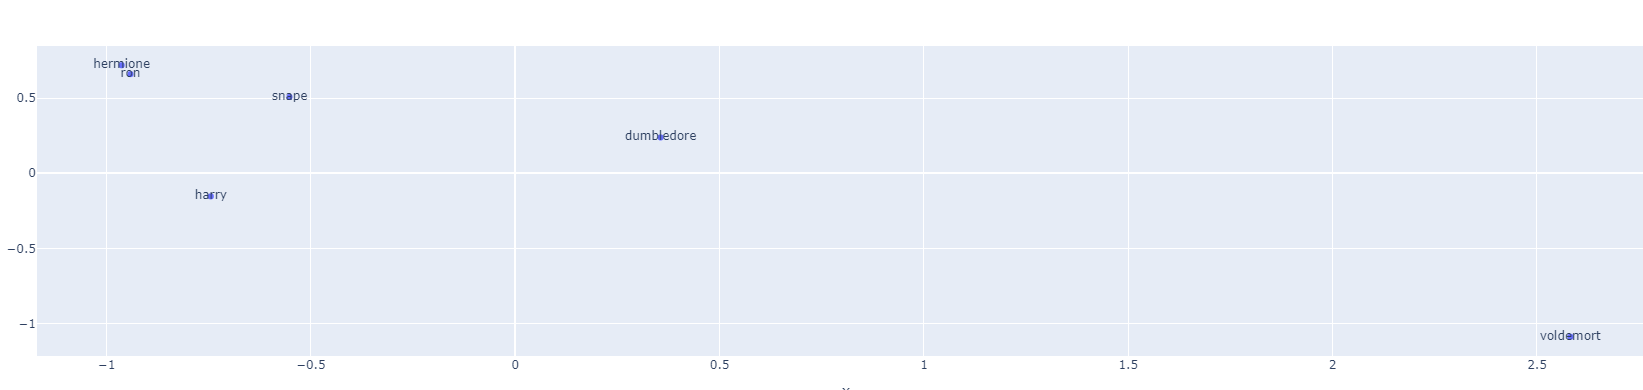

In [2]:
Image(filename='Picture2.png') 

Aqui podemos ver algunos de los protagonistas, los buenos del lazo izquierdo y voldemort, el enemigo lejos a la derecha. Notable ademas que Hermione y Ron siendo los dos compañeros de Harry esten tan cerca. Ademas ellos son pareja, quizas la cercania de los conceptos refleje eso.